In [4]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 4.9MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=687d41a08232556a17a6853ea26d6a9892aa5ff02cc0e291016b92d5e08dbb9e
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


======================================
O problema da gorjeta - A maneira mais difícil
======================================

 Nota: este método calcula tudo manualmente, passo a passo. Para a maioria das pessoas,
 a nova API para sistemas fuzzy será preferível. O mesmo problema está resolvido
 com a nova API `neste exemplo <./ plot_tipping_problem_newapi.html>` _.

O 'problema de inclinação' é comumente usado para ilustrar o poder da lógica fuzzy
princípios para gerar um comportamento complexo a partir de um conjunto compacto e intuitivo de
regras de especialistas.

Variáveis ​​de entrada
---------------

Uma série de variáveis ​​influenciam a decisão sobre quanto dar gorjeta enquanto
jantar. Considere dois deles:

* `` quality``: Qualidade da comida
* `` service``: Qualidade do serviço

Variável de saída
---------------

A variável de saída é simplesmente o valor da gorjeta, em pontos percentuais:

* `` tip``: Porcentagem da conta para adicionar como gorjeta


Para fins de discussão, digamos que precisamos de 'alto', 'médio' e 'baixo'
funções de associação para variáveis ​​de entrada e nossa variável de saída. Estes
são definidos em scikit-fuzzy como segue

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [9]:
# Generate universe variables - Gerar variáveis ​​de universo
#   * Quality and service on subjective ranges [0, 10] - Qualidade e serviço em faixas subjetivas [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points - Tip tem um intervalo de [0, 25] em unidades de pontos percentuais
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

In [10]:
# Generate fuzzy membership functions - Gerar funções de associação difusas
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

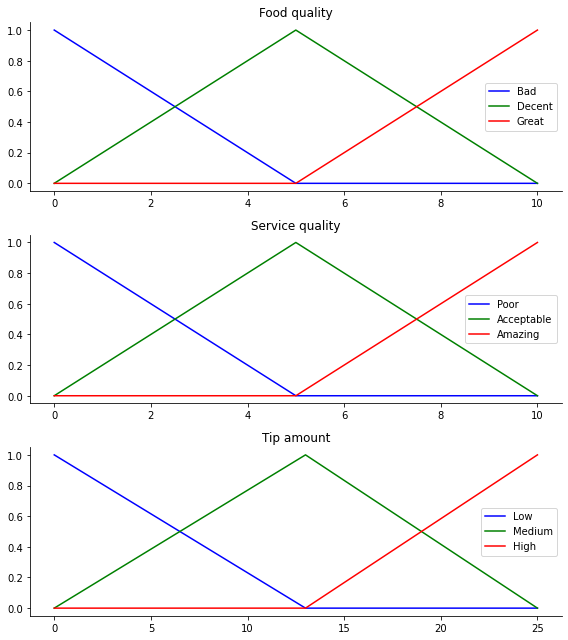

In [11]:
# Visualize these universes and membership functions - Visualize esses universos e funções de adesão
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes - Desligue os eixos superior / direito
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Fuzzy rules
-----------

Ora, para tornar esses triângulos úteis, definimos a * relação difusa *
Entre variáveis ​​de entrada e saída. Para fins de nosso exemplo, considere
Três regras simples:

1. Se a comida for ruim OU o serviço for ruim, então a gorjeta será baixa
2. Se o serviço for aceitável, a gorjeta será média
3. Se a comida for ótima OU o serviço for incrível, a gorjeta será alta.

A maioria das pessoas concordaria com essas regras, mas as regras são confusas. Mapeando o
Regras imprecisas em uma dica definida e acionável é um desafio. Isto é o
Tipo de tarefa em que a lógica fuzzy se destaca.

Aplicação de regra
----------------

Qual seria a dica nas seguintes circunstâncias:

* Comida * qualidade * era ** 6,5 **
* * Serviço * era ** 9,8 **

In [12]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
# Precisamos da ativação de nossas funções de pertinência difusa nesses valores.
# Os valores exatos 6.5 e 9.8 não existem em nossos universos ...
# É para isso que existe fuzz.interp_membership!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)


In [13]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
# Agora pegamos nossas regras e as aplicamos. A regra 1 diz respeito a comida OU serviço ruim.
# O operador OR significa que pegamos o máximo desses dois.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
# Agora aplicamos isso cortando o topo da saída correspondente
# função de associação com `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0 - Removido inteiramente para 0

# For rule 2 we connect acceptable service to medium tipping
# Para a regra 2, conectamos serviço aceitável a gorjeta média
tip_activation_md = np.fmin(serv_level_md, tip_md)

# For rule 3 we connect high service OR high food with high tipping
# Para a regra 3, conectamos alto serviço OU alta comida com alta gorjeta
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

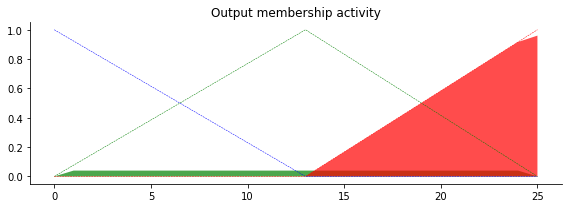

In [14]:
# Visualize this - Visualize isso
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes - Desligue os eixos superior / direito
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


Agregação de regra
----------------

Com a * atividade * de cada função de associação de saída conhecida, todas as saídas
As funções de associação devem ser combinadas. Isso normalmente é feito usando um
Operador máximo. Esta etapa também é conhecida como * agregação *.

Defuzzificação
---------------
Finalmente, para obter uma resposta do mundo real, voltamos à lógica * nítida * da
Mundo das funções de associação difusas. Para os fins deste exemplo
O método do centróide será usado.

O resultado é uma gorjeta de ** 20,2% **.
---------------------------------



In [15]:
# Aggregate all three output membership functions together
# Agregar todas as três funções de associação de saída juntas
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

In [16]:
# Calculate defuzzified result
# Calcular resultado defuzzificado
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot


Text(0.5, 1.0, 'Aggregated membership and result (line)')

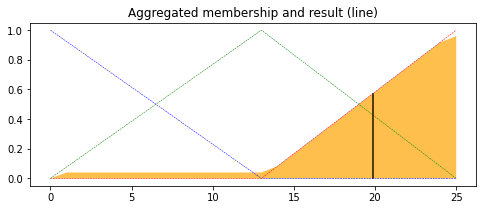

In [17]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

In [18]:
# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

Pensamentos finais
--------------

O poder dos sistemas fuzzy permite um comportamento complicado e intuitivo baseado
Em um sistema esparso de regras com sobrecarga mínima. Observe nossa associação
Universos de função eram grosseiros, definidos apenas nos inteiros, mas
`` fuzz.interp_membership`` permitiu que a resolução efetiva aumentasse em
Exigem. Este sistema pode responder a mudanças arbitrariamente pequenas nas entradas,
E a carga de processamento é mínima.